<a href="https://colab.research.google.com/github/KadeF10/Spotify/blob/main/Project_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests 
import pandas as pd
url= 'https://raw.githubusercontent.com/KadeF10/Spotify/main/data.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
lm = LinearRegression()
lm

LinearRegression()

In [4]:
X = df[['liveness']]
Y = df['energy']

In [5]:
lm.fit(X,Y)

LinearRegression()

In [6]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([0.6739761 , 0.66574096, 0.67221143, 0.65256473, 0.75456285])

In [7]:
lm.intercept_

0.625447581381173

In [8]:
lm.coef_

array([0.29411223])

In [9]:
Z = df[['liveness', 'loudness', 'speechiness', 'tempo']]

In [10]:
lm.fit(Z, df['energy'])

LinearRegression()

In [11]:
lm.intercept_

0.8993571716351044

In [12]:
lm.coef_

array([0.13546384, 0.04124532, 0.03032687, 0.00037669])

In [13]:
# import the visualization package: seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

(0.0, 1.04716)

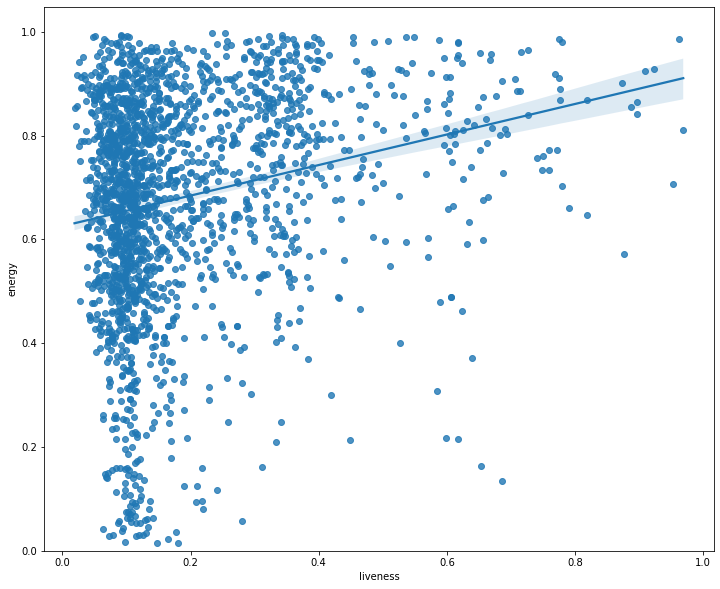

In [14]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="liveness", y="energy", data=df)
plt.ylim(0,)

(0.0, 1.0719949274021285)

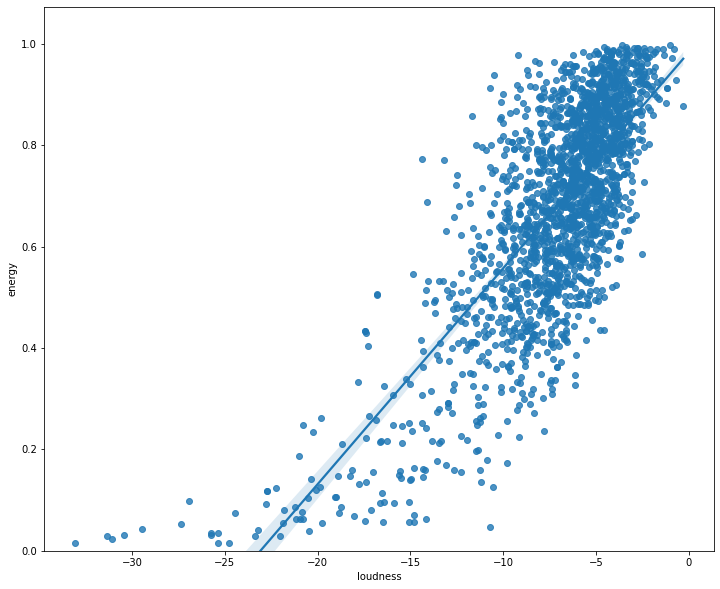

In [15]:
plt.figure(figsize=(width, height))
sns.regplot(x="loudness", y="energy", data=df)
plt.ylim(0,)

(0.0, 1.04716)

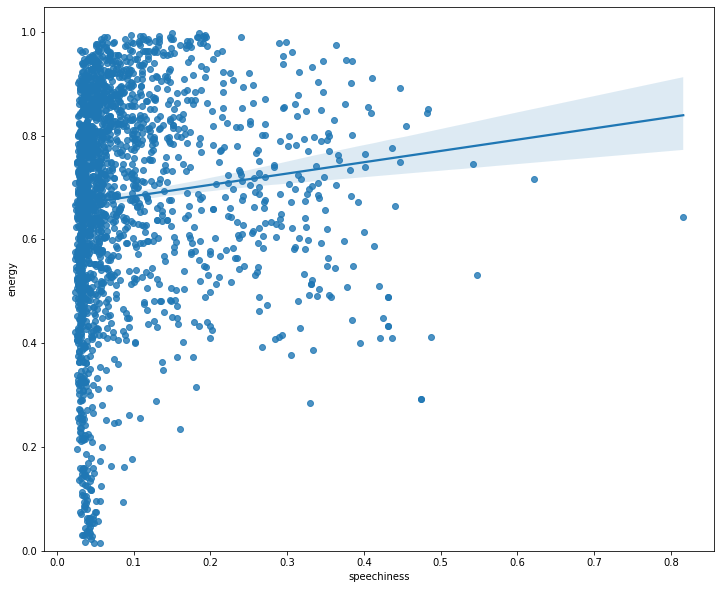

In [33]:
plt.figure(figsize=(width, height))
sns.regplot(x="speechiness", y="energy", data=df)
plt.ylim(0,)

(0.0, 1.04716)

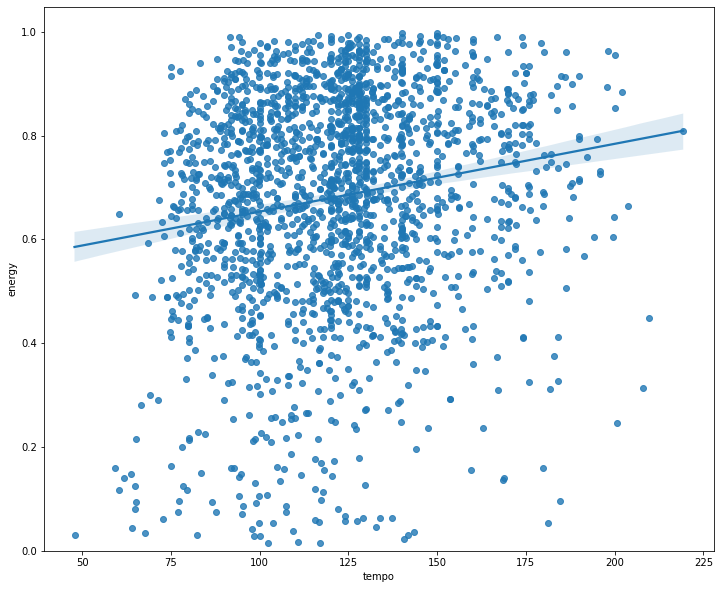

In [34]:
plt.figure(figsize=(width, height))
sns.regplot(x="tempo", y="energy", data=df)
plt.ylim(0,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


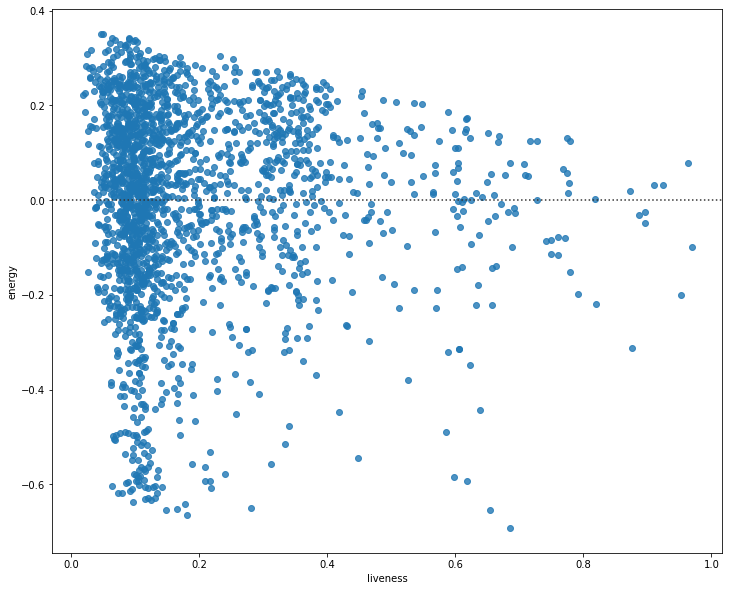

In [35]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['liveness'], df['energy'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


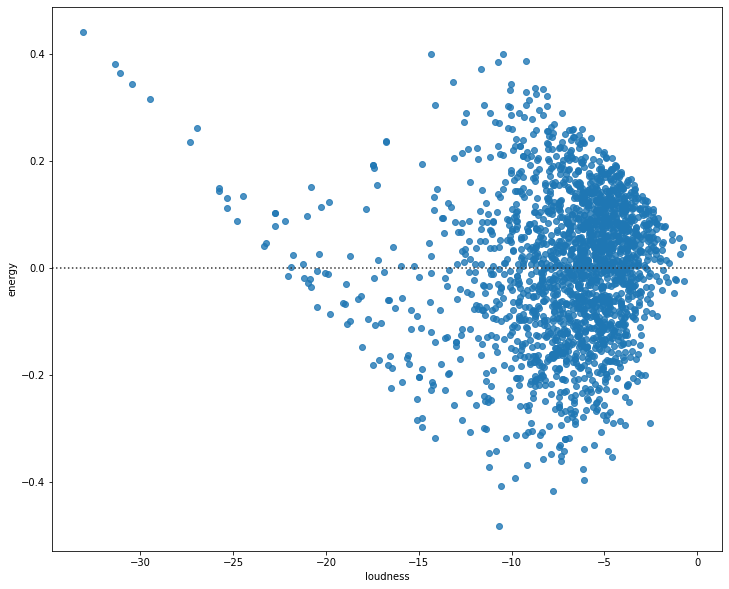

In [36]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['loudness'], df['energy'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


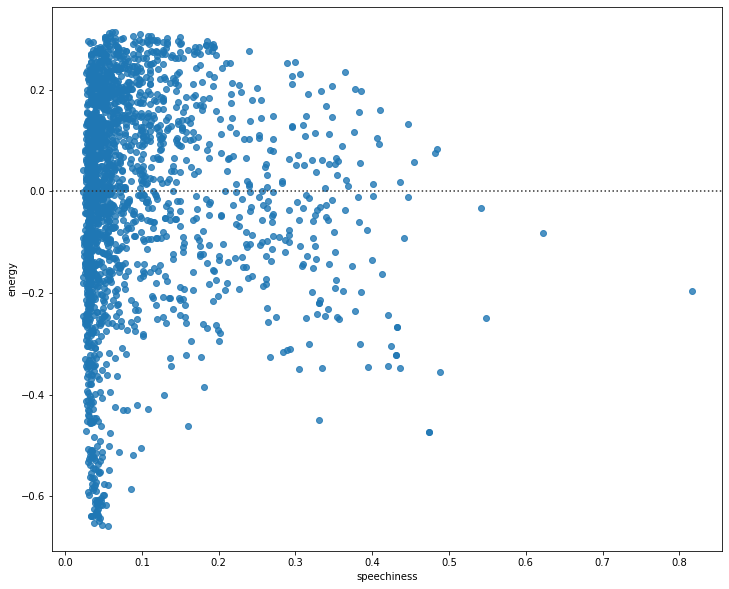

In [37]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['speechiness'], df['energy'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


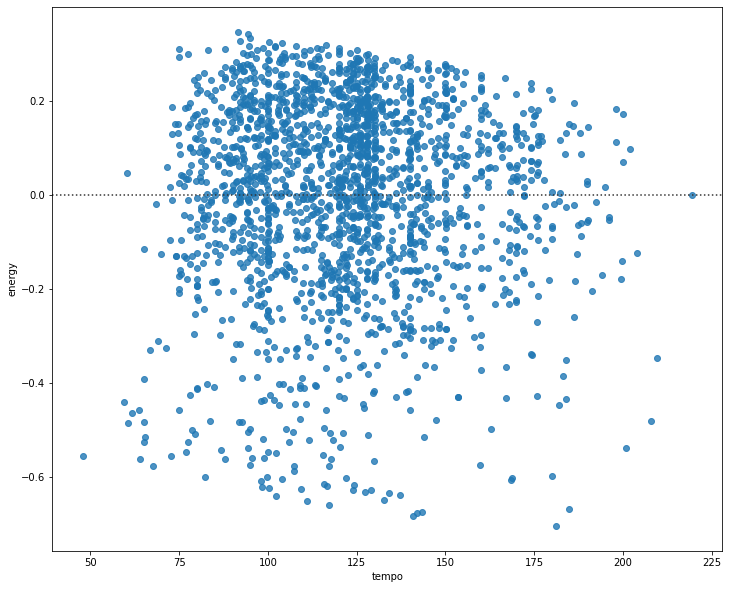

In [38]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['tempo'], df['energy'])
plt.show()

In [17]:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


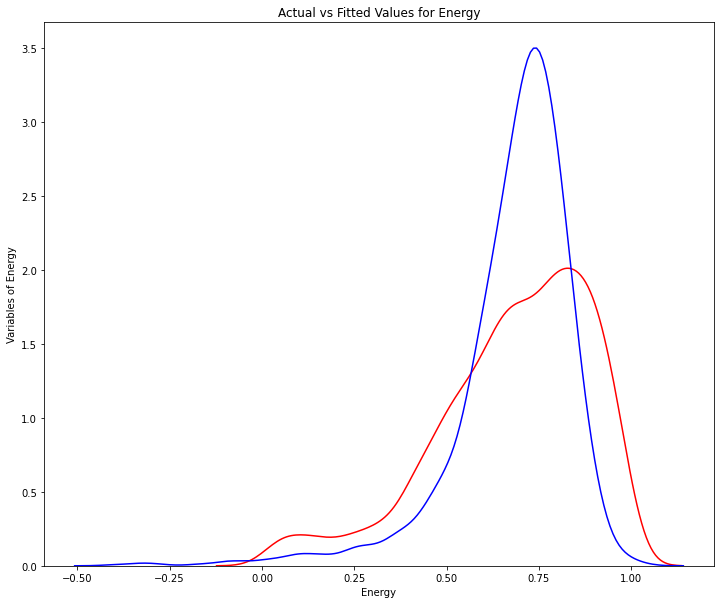

In [18]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['energy'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Energy')
plt.xlabel('Energy')
plt.ylabel('Variables of Energy')

plt.show()
plt.close()

In [32]:

lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.047277909014334596


In [20]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [0.6739761  0.66574096 0.67221143 0.65256473]


In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mse = mean_squared_error(df['energy'], Yhat)
print('The mean square error of energy and predicted value is: ', mse)

The mean square error of energy and predicted value is:  0.04210347324898522


In [23]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Energy ~ Spotify')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Energy')

    plt.show()
    plt.close()

In [26]:
import numpy as np

In [24]:
x = df['liveness']
y = df['energy']

In [27]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

         3          2
-0.8467 x + 0.7534 x + 0.1624 x + 0.6287


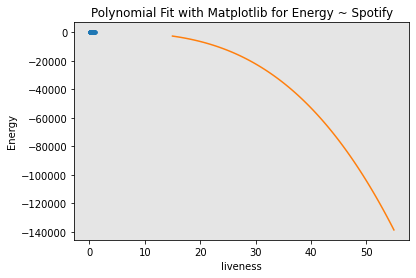

In [28]:
PlotPolly(p, x, y, 'liveness')

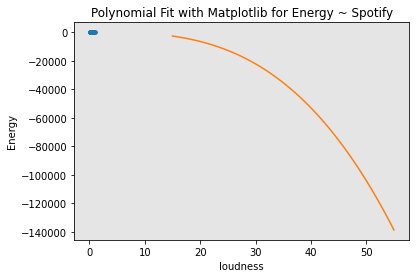

In [29]:
PlotPolly(p, x, y, 'loudness')

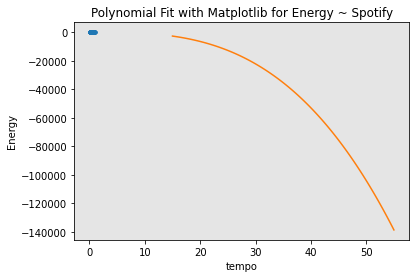

In [31]:
PlotPolly(p, x, y, 'tempo')

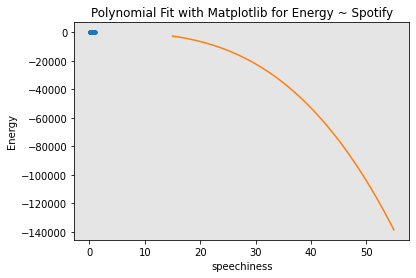

In [30]:
PlotPolly(p, x, y, 'speechiness')